# Compute and plot EMD

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot
from ot.datasets import get_1D_gauss as gauss

### Generate data

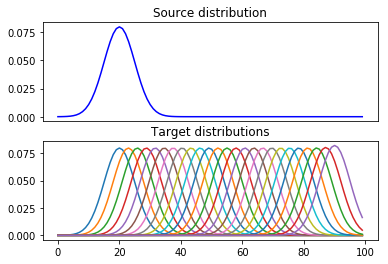

In [4]:

n=100 # nb bins
n_target=25 # nb target distributions


# bin positions
x=np.arange(n,dtype=np.float64)

lst_m=np.linspace(20,90,n_target)

# Gaussian distributions
a=gauss(n,m=20,s=5) # m= mean, s= std

B=np.zeros((n,n_target))

for i,m in enumerate(lst_m):
    B[:,i]=gauss(n,m=m,s=5)
    

# loss matrix and normalization
M=ot.dist(x.reshape((n,1)),x.reshape((n,1)),'euclidean')
M/=M.max()


M2=ot.dist(x.reshape((n,1)),x.reshape((n,1)),'sqeuclidean')
M2/=M2.max()


# plot the distributions

pl.figure(1)
pl.subplot(2,1,1)
pl.plot(x,a,'b',label='Source distribution')
pl.xticks([])
pl.title('Source distribution')
pl.subplot(2,1,2)
pl.plot(x,B,label='Target distributions')
pl.title('Target distributions')
pl.show()    

### Compute EMD and sinkhorn distances 

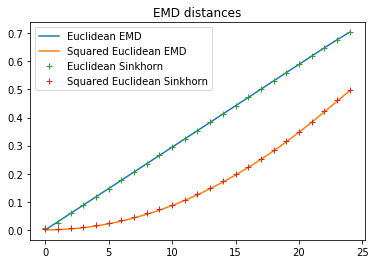

In [6]:

d_emd=ot.emd2(a,B,M) # direct computation of EMD
d_emd2=ot.emd2(a,B,M2)  # direct computation of EMD with loss M2

reg=1e-2
d_sinkhorn=ot.sinkhorn(a,B,M,reg) # sinkhorn returns a list of distance if B is a matrix
d_sinkhorn2=ot.sinkhorn(a,B,M2,reg)

pl.figure(2)
pl.clf()
pl.plot(d_emd,label='Euclidean EMD')
pl.plot(d_emd2,label='Squared Euclidean EMD')
pl.plot(d_sinkhorn,'+',label='Euclidean Sinkhorn')
pl.plot(d_sinkhorn2,'+',label='Squared Euclidean Sinkhorn')
pl.title('EMD distances')
pl.legend()
pl.show()